In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0117.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0101.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0108.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0110.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0119.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0115.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0116.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0105.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0106.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0121.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0111.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0103.jpeg
/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0120.jpeg
/kaggle/input/covid19-image-dataset/Co

In [35]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam



In [36]:
base_dir = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'

Normal_dir = os.path.join(base_dir, 'Normal')
Covid_dir = os.path.join(base_dir, 'Covid')
Viral_Pneumonia_dir = os.path.join(base_dir, 'Viral Pneumonia')

print('total training Normal images:', len(os.listdir(Normal_dir)))
print('total training Covid images:', len(os.listdir(Covid_dir)))
print('total training Viral Pneumonia images:', len(os.listdir(Viral_Pneumonia_dir)))

Normal_files = os.listdir(Normal_dir)
print(Normal_files[:10])

Covid_files = os.listdir(Covid_dir)
print(Covid_files[:10])

Viral_Pneumonia_files = os.listdir(Viral_Pneumonia_dir)
print(Viral_Pneumonia_files[:10])

total training Normal images: 70
total training Covid images: 111
total training Viral Pneumonia images: 70
['071.jpeg', '014.jpeg', '073.jpeg', '05.jpeg', '023.jpeg', '01.jpeg', '096.jpeg', '060.jpeg', '063.jpeg', '059.jpeg']
['032.jpeg', '01.jpeg', 'COVID-00014.jpg', '080.jpg', '060.jpeg', '092.png', 'COVID-00005.jpg', 'COVID-00031.jpg', '059.jpeg', '067.jpg']
['071.jpeg', '035.jpeg', '032.jpeg', '073.jpeg', '037.jpeg', '05.jpeg', '023.jpeg', '01.jpeg', '096.jpeg', '063.jpeg']


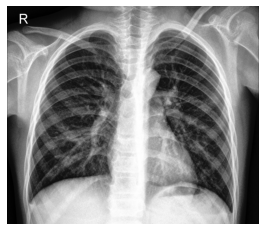

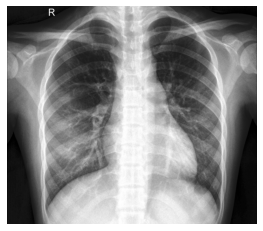

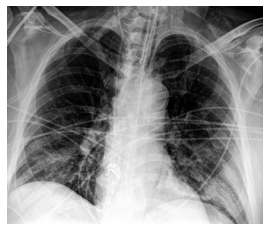

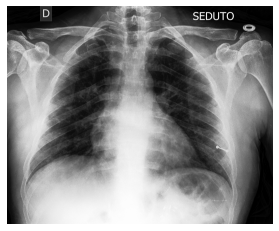

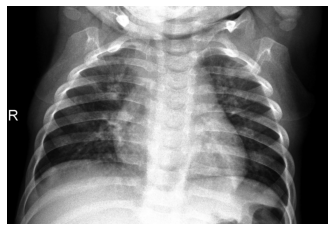

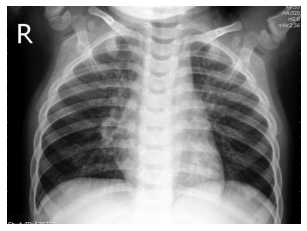

In [37]:
import matplotlib.image as mpimg
pic_index = 2

next_Normal = [os.path.join(Normal_dir, fname) 
                for fname in Normal_files[pic_index-2:pic_index]]
next_Covid = [os.path.join(Covid_dir, fname) 
                for fname in Covid_files[pic_index-2:pic_index]]
next_Viral_Pneumonia = [os.path.join(Viral_Pneumonia_dir, fname) 
                for fname in Viral_Pneumonia_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_Normal+next_Covid+next_Viral_Pneumonia):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [38]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('accuracy') > 0.91):
      print("\nReached 93% accuracy, canceling training")
      self.model.stop_training = True

callbacks = myCallback()

In [40]:

callbacks = myCallback()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(255, 255, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 253, 253, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 64)       

In [42]:

model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [43]:

    
train_dir = "/kaggle/input/covid19-image-dataset/Covid19-dataset/train"
train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

validation_dir = "/kaggle/input/covid19-image-dataset/Covid19-dataset/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size=(255,255),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(255,255),
	class_mode='categorical',
  batch_size=16
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [44]:
history = model.fit(train_generator, epochs=50,
                    steps_per_epoch=3,
                    validation_data = validation_generator,
                    verbose = 1, validation_steps=3,callbacks = [callbacks])

Epoch 1/50
3/3 [==============================] - 21s 7s/step - loss: 1.0813 - accuracy: 0.4332 - val_loss: 0.9960 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 18s 6s/step - loss: 1.0042 - accuracy: 0.4583 - val_loss: 0.9159 - val_accuracy: 0.7083
Epoch 3/50
3/3 [==============================] - 19s 7s/step - loss: 0.9101 - accuracy: 0.6667 - val_loss: 0.7301 - val_accuracy: 0.6458
Epoch 4/50
3/3 [==============================] - 18s 6s/step - loss: 0.7845 - accuracy: 0.6791 - val_loss: 0.7061 - val_accuracy: 0.6667
Epoch 5/50
3/3 [==============================] - 19s 6s/step - loss: 0.7226 - accuracy: 0.7219 - val_loss: 0.6179 - val_accuracy: 0.7292
Epoch 6/50
3/3 [==============================] - 19s 6s/step - loss: 0.6784 - accuracy: 0.7433 - val_loss: 0.5506 - val_accuracy: 0.7500
Epoch 7/50
3/3 [==============================] - 19s 7s/step - loss: 0.5757 - accuracy: 0.7344 - val_loss: 0.4697 - val_accuracy: 0.7708
Epoch 8/50
3/3 [==================

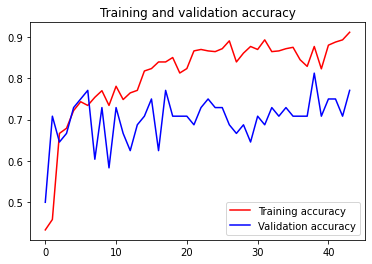

<Figure size 432x288 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()